In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
from multiprocessing import Pool, TimeoutError

In [3]:
n = 1000
def g_gen():
    global n
    q = 2
    c = 8
    eps = 0
    p_in = c/n + eps/(2*n)
    p_out = c/n - eps/(2*n)
    g = nx.planted_partition_graph(q, int(n/q), p_in, p_out)
    return g

In [4]:
def infect(p):
    global n
    g = g_gen()
    infectious = [random.choice(list(g.nodes()))]
    time = 1
    infected = []
    while infectious:
        infected += infectious #add infectious nodes to infected list
        time += 1
        infectious_next = []
        for v in infectious:
            for u in g.neighbors(v):
                if random.random() <= p: #infect with prob p
                    infectious_next.append(u)
        infectious = [v for v in set(infectious_next) if v not in infected]
    return time, len(infected)/n

In [5]:
def get_avg(p,m):
    times = []
    infected = []
    for j in range(m):
        t, i = infect(p)
        times.append(t)
        infected.append(i)
    return sum(times)/m, sum(infected)/m

In [17]:
m = 200
times = []
infected = []
pplot = []
ptests = list(np.linspace(0,0.13,100)) 
ptests += list(np.linspace(0.13,0.3,250)) 
ptests += list(np.linspace(0.3,1,100))
    
def run_tests(p):
    global m
    t, i = get_avg(p,m)
    return [t,i,p]

if __name__ == '__main__':
    # start 4 worker processes
    with Pool(processes=4) as pool:
        # list of [[times, infected, qplot, pplot for certain q], ...]
        l = list(pool.map(run_tests, ptests))
    for i in range(len(l)):
        cur = l[i]            
        times.append(cur[0])
        infected.append(cur[1])
        pplot.append(cur[2])

Text(0, 0.5, 'Epidemic length')

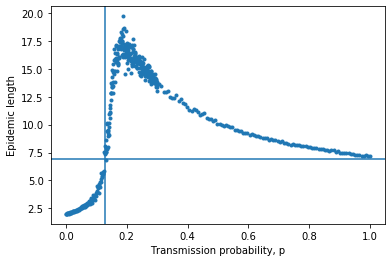

In [18]:
plt.plot(ptests, times, '.')
plt.axhline(y = np.log(n))
plt.axvline(x = 0.13)
plt.xlabel("Transmission probability, p")
plt.ylabel("Epidemic length")

Text(0, 0.5, 'Average Epidemic Size')

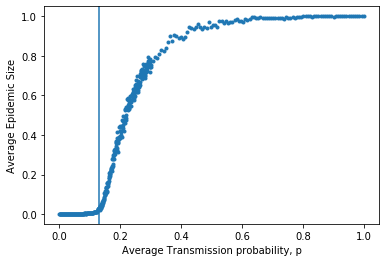

In [19]:
plt.plot(ptests, infected, '.')
plt.axvline(x = 0.13)
plt.xlabel("Average Transmission probability, p")
plt.ylabel("Average Epidemic Size")